# Fetching Breast Cancer Dataset

### 2.2 fetching_breast_cancer_dataset.ipynb
### James Saslow
### 4/27/2024

_______________________________________________________________________________________

This Jupyter Notebook calls the "Breast Cancer Wisconsin (Original)" dataset from the UCI Machine Learning Repo found here: http://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original. The Breast Cancer dataset is a 9 - feature dataset with 699 instances and contains 2 classes of data. The Features of the dataset are 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', and 'Mitoses', which are all on an integer scale from 1-10. The class instances are '2', which indicates benign, and '4' which indicates malignant.

In this code, I reformat the dataframe to hold two new columns for 'Clump_thickness' and 'Uniformity_of_cell_size' which are min-max scaled to fit on the interval $\in (0,1)$. These scaled columns are stored in 'Clump_thickness scaled' and	'Uniformity_of_cell_size scaled' respectively. Additionally, 2 more columns are appended called 'target' and 'binary target'. 'target' holds the classifications as described by the original dataset in terms of either a '2' or '4'. Whereas 'target binary' maps these classification onto binary variables such that $'2' \rightarrow 0$ and $'4' \rightarrow 1$. Thus, ideally, our trained binary classifier will return *0* for a patient with benign breast cancer and will return *1* for a patient with malignant breast cancer.

After plotting the data, we see that because 'Clump_thickness' and 'Uniformity_of_cell_size' are only on a 1-10 integer scale, there is many instances of overlap and non-linear seperability of the data. Thus, this dataset is intended to be a more difficult benchmark of a classification task as compared to the 'iris' data. After compiling, the Jupyter Notebook returns a file called 'breast_cancer_dataset.csv' to be imported in *QNN_breast_cancer.ipynb*.

__________________________________________________________________________________________________
[1] A. Daskin, “A simple quantum neural net with a periodic activation function,” 2018 IEEE International Conference on Systems, Man, and Cybernetics (SMC), Oct. 2018. doi:10.1109/smc.2018.00491 

In [1]:
# Importing Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ucimlrepo import fetch_ucirepo 

In [2]:
# Defining Functions

def MinMax_Scaling(df, feature_name):
    '''
    Function Description:
    Scales Data in a Pandas dataframe to a [0,1] interval using Min-Max scaling
    and returns an updated data frame with a new column of the scaled feature
    
    Params:
    - df            : A Pandas Dataframe
    - feature_name : A type string of the feature in the dataframe you want to Min-Max scale
    '''

    x = np.array(df[feature_name])
    
    x_scaled = (x-min(x))/(max(x) - min(x))  # Min - Max Scaling of user-specified feature

    df[feature_name + " scaled"] = x_scaled # Updating the dataframe with a new column of the scaled variable

    return df

In [3]:
# Fetching Dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 

df = breast_cancer_wisconsin_original.data.features     # Making a Pandas Dataframe of Breast Cancer Features
num_data = len(df)                                      # Counting Number of Data points


df = MinMax_Scaling(df, "Clump_thickness")              # MinMax Scaling the "Clump_thickness"
df = MinMax_Scaling(df, "Uniformity_of_cell_size")      # MinMax Scaling the "Uniformity_of_cell_size"


df["targets"] = breast_cancer_wisconsin_original.data.targets   # Appending a column with cancer diagnosis

# Assigning binary class labels: If '2'(benign)->0, else if '4'(malignant) -> 1
binary_targets = []
targets = df["targets"]
for i in range(num_data):
    if targets[i] == 2: 
        binary_targets.append(0)
    elif targets[i] == 4: 
        binary_targets.append(1)

# Adding Binary Labelings to the Dataframe
df["binary targets"] = binary_targets

del binary_targets

df = df.sample(frac=1) # Randomly Shuffling around data

df # Displaying dataframe

C:\Users\james\AppData\Local\Temp\ipykernel_9312\1697467135.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature_name + " scaled"] = x_scaled # Updating the dataframe with a new column of the scaled variable


,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Clump_thickness scaled,Uniformity_of_cell_size scaled,targets,binary targets
683,1,1,1,1,2,1.0,1,1,1,0.000000,0.000000,2,0
484,5,1,2,1,2,1.0,1,1,1,0.444444,0.000000,2,0
479,4,8,7,10,4,10.0,7,5,1,0.333333,0.777778,4,1
277,1,1,1,1,2,1.0,2,1,1,0.000000,0.000000,2,0
122,10,10,10,2,10,10.0,5,3,3,1.000000,1.000000,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,3,1,1,1,2,1.0,1,1,1,0.222222,0.000000,2,0
269,1,1,1,1,2,1.0,3,1,1,0.000000,0.000000,2,0
301,1,1,1,1,2,1.0,3,1,1,0.000000,0.000000,2,0
681,5,10,10,10,4,10.0,5,6,3,0.444444,1.000000,4,1


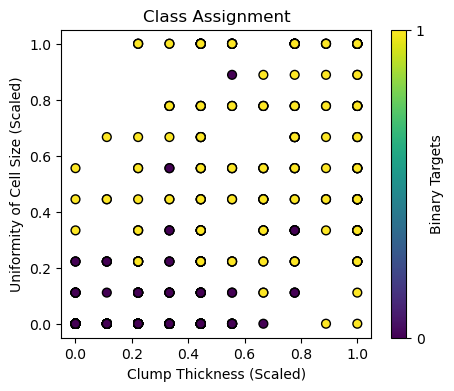

In [4]:
# Data Visualization


# Calling clump thickness scaled, uniformity of cell size scaled, and binary class assignment
clump_thickness         = df["Clump_thickness scaled"].values
uniformity_of_cell_size = df["Uniformity_of_cell_size scaled"].values
binary_targets = df["binary targets"]


# Plotting Uniformity of cell size vs clump thickness and their class assignment
plt.figure(figsize=(5,4))
plt.title('Class Assignment')
plt.scatter(clump_thickness, uniformity_of_cell_size, c = binary_targets, edgecolors='black', s = 40)
plt.xlabel('Clump Thickness (Scaled)')
plt.ylabel('Uniformity of Cell Size (Scaled)')
plt.colorbar(label='Binary Targets', ticks=[0, 1]) 
plt.show()

In [5]:
# Exporting the Dataframe to a csv file
df.to_csv('breast_cancer_dataset.csv', index = False)